In [128]:
train_corpus = ["are you still here ?",
"where are you ?",
"are you tired ?",
"i am tired .",
"are you in england ?",
"were you in mexico ?"]

## Unigrams

In [129]:
def calculate_unigrams(corpus):
    unigrams = {}
    total_words = 0
    for sentence in corpus:
        sentence = '<BOS> ' + sentence
        for word in sentence.split(" "):
            if word not in unigrams:
                unigrams[word] = 1
            else:
                unigrams[word]+=1
            total_words +=1
    return unigrams, total_words

In [130]:
def calculate_unigrams_probability(unigrams, total_tokens):
    prob_values = {}
    for word in unigrams:
        prob_values[word] = unigrams[word]/total_tokens
    return prob_values

In [131]:
unigrams, total_tokens = calculate_unigrams(train_corpus)
print(unigrams, total_tokens)

{'<BOS>': 6, 'are': 4, 'you': 5, 'still': 1, 'here': 1, '?': 5, 'where': 1, 'tired': 2, 'i': 1, 'am': 1, '.': 1, 'in': 2, 'england': 1, 'were': 1, 'mexico': 1} 33


In [132]:
unigram_probabilities = calculate_unigrams_probability(unigrams, total_tokens)

In [133]:
unigram_probabilities

{'<BOS>': 0.18181818181818182,
 'are': 0.12121212121212122,
 'you': 0.15151515151515152,
 'still': 0.030303030303030304,
 'here': 0.030303030303030304,
 '?': 0.15151515151515152,
 'where': 0.030303030303030304,
 'tired': 0.06060606060606061,
 'i': 0.030303030303030304,
 'am': 0.030303030303030304,
 '.': 0.030303030303030304,
 'in': 0.06060606060606061,
 'england': 0.030303030303030304,
 'were': 0.030303030303030304,
 'mexico': 0.030303030303030304}

## Unigram Combine Probability

In [134]:
def calculate_unigram_combine_probability(probability_values):
    combine_probability = 1
    for probability in probability_values.values():
        combine_probability *= probability  
    return combine_probability

## Unigram Perplexity

In [135]:
unigrams, total_tokens = calculate_unigrams(train_corpus)

unigram_probabilities = calculate_unigrams_probability(unigrams, total_tokens)

combine_probability = calculate_unigram_combine_probability(unigram_probabilities)

## Question : Whether to use len(unigram) or total_tokens
unigram_train_perplexity = combine_probability ** (-1/(total_tokens-1))

In [136]:
unigram_train_perplexity

4.038051077131478

## Unigrams Test Perplexity

In [137]:
test_corpus = ["are you in mexico ?",
"i am in mexico .",
"are you still in mexico ?",
"were you in england ?",
"where are you ?"]

test_unigrams, test_total_tokens = calculate_unigrams(test_corpus)

print(test_total_tokens, test_unigrams)

combine_probability = 1
for unigram in test_unigrams:
    ## Question : What if we get new unigram which is not in train corpus - (0.01/total_tokens)
    combine_probability*=unigram_probabilities[unigram]
    
# print(combine_probability)

## Question : Whether to use len(unigram) or total_tokens (SAME AS ABOVE)

unigram_test_perplexity = combine_probability ** (-1/(test_total_tokens-1))

print(unigram_test_perplexity)

30 {'<BOS>': 5, 'are': 3, 'you': 4, 'in': 4, 'mexico': 3, '?': 4, 'i': 1, 'am': 1, '.': 1, 'still': 1, 'were': 1, 'england': 1, 'where': 1}
3.7543476179207453


## Bigrams

In [138]:
def calculate_bigrams(corpus):
    bigrams = {}
    total_bigrams = 0
    for sentence in corpus:
        sentence = '<BOS> ' + sentence
        words = sentence.split(" ")
        for i in range(len(words)-1):
            if (words[i], words[i+1]) not in bigrams:
                bigrams[(words[i], words[i+1])] = 1
            else:
                bigrams[(words[i], words[i+1])]+=1
            total_bigrams +=1
    return bigrams

In [139]:
bigrams = calculate_bigrams(train_corpus)

bigrams

{('<BOS>', 'are'): 3,
 ('are', 'you'): 4,
 ('you', 'still'): 1,
 ('still', 'here'): 1,
 ('here', '?'): 1,
 ('<BOS>', 'where'): 1,
 ('where', 'are'): 1,
 ('you', '?'): 1,
 ('you', 'tired'): 1,
 ('tired', '?'): 1,
 ('<BOS>', 'i'): 1,
 ('i', 'am'): 1,
 ('am', 'tired'): 1,
 ('tired', '.'): 1,
 ('you', 'in'): 2,
 ('in', 'england'): 1,
 ('england', '?'): 1,
 ('<BOS>', 'were'): 1,
 ('were', 'you'): 1,
 ('in', 'mexico'): 1,
 ('mexico', '?'): 1}

## Bigram Probability values

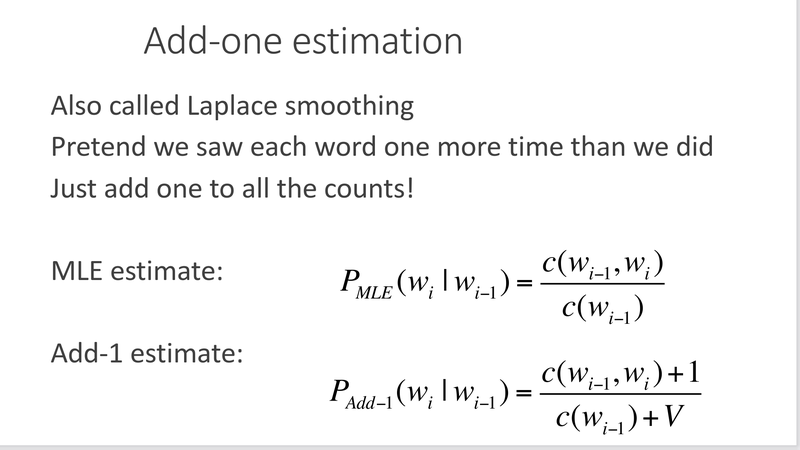

In [140]:
def calculate_bigram_probability(bigrams, unigrams):
    bigram_probabilities = {}
    for tokens in bigrams:
#         if tokens[0] not in bigram_probabilities:
#             bigram_probabilities[tokens[0]] = {tokens[1] : (bigrams[tokens]+1)/(unigrams[tokens[0]]+ len(unigrams))}
#         else:
#             bigram_probabilities[tokens[0]][tokens[1]] = (bigrams[tokens]+1)/(unigrams[tokens[0]] + len(unigrams))
            
        if tokens[0] not in bigram_probabilities:
            bigram_probabilities[tokens[0]] = {tokens[1] : (bigrams[tokens])/(unigrams[tokens[0]])}
        else:
            bigram_probabilities[tokens[0]][tokens[1]] = (bigrams[tokens])/(unigrams[tokens[0]])
    return bigram_probabilities

In [141]:
bigram_probabilities = calculate_bigram_probability(bigrams, unigrams)

bigram_probabilities

{'<BOS>': {'are': 0.5,
  'where': 0.16666666666666666,
  'i': 0.16666666666666666,
  'were': 0.16666666666666666},
 'are': {'you': 1.0},
 'you': {'still': 0.2, '?': 0.2, 'tired': 0.2, 'in': 0.4},
 'still': {'here': 1.0},
 'here': {'?': 1.0},
 'where': {'are': 1.0},
 'tired': {'?': 0.5, '.': 0.5},
 'i': {'am': 1.0},
 'am': {'tired': 1.0},
 'in': {'england': 0.5, 'mexico': 0.5},
 'england': {'?': 1.0},
 'were': {'you': 1.0},
 'mexico': {'?': 1.0}}

## Check the bigram probabilities

In [142]:
import math
def check_bigram_probabilities(corpus, bigram_probabilities, unigram_probabilities, total_tokens):
    results = []
    for sentence in corpus:
        probability = 1
        sentence = '<BOS> ' + sentence
        words = sentence.split(" ")
        for i in range(len(words)):
            if i+1 < len(sentence.split(" ")):
                if words[i+1] not in bigram_probabilities[words[i]]:
                    ## Question : Whether to use len(unigram) or total_tokens
                    probability *=1/(unigram_probabilities[words[i]] + len(unigram_probabilities))
                else:
                    probability *=bigram_probabilities[words[i]][words[i+1]]
        results.append((sentence, probability))

    for sentence in results:
        print(sentence[0], sentence[1], math.log(sentence[1]))

In [143]:
test_corpus = ["are you in mexico?",
               "i am in mexico .",
               "are you still in mexico ?",
               "were you in england ?",
               "where are you ?"]
check_bigram_probabilities(test_corpus, bigram_probabilities, unigram_probabilities, total_tokens)


<BOS> are you in mexico? 0.013279678068410464 -4.321520377064249
<BOS> i am in mexico . 0.0003688784469302809 -7.905043380304895
<BOS> are you still in mexico ? 0.0033266129032258063 -5.7058006388124385
<BOS> were you in england ? 0.03333333333333333 -3.4011973816621555
<BOS> where are you ? 0.03333333333333333 -3.4011973816621555


## Bigram Perplexity

In [144]:
combine_prob = 1

for key, item in bigram_probabilities.items():
    for k, v in item.items():
        combine_prob *= v

combine_prob

4.6296296296296307e-07

In [145]:
bigram_train_perplexity = combine_prob ** (-1/(total_tokens-1))

bigram_train_perplexity

1.57743575199102

In [146]:
bigram_train_perplexity

1.57743575199102

## Bigram Test Perplexity

In [147]:
test_corpus = ["are you in mexico ?",
"i am in mexico .",
"are you still in mexico ?",
"i am tired .",
"were you in england ?",
"where are you ?"]

test_bigrams = calculate_bigrams(test_corpus)

combine_probability = 1
for bigram in test_bigrams:
    if bigram[1] not in bigram_probabilities[bigram[0]]:
        combine_probability*=1/(unigram_probabilities[bigram[0]] + len(unigram_probabilities))
    else:
        combine_probability*=bigram_probabilities[bigram[0]][bigram[1]]
    
bigram_test_perplexity = combine_probability ** (-1/(test_total_tokens-1))

print(bigram_test_perplexity)

2.021631352246097


In [148]:
print(unigram_train_perplexity)
print(unigram_test_perplexity)
print(bigram_train_perplexity)
print(bigram_test_perplexity)

4.038051077131478
3.7543476179207453
1.57743575199102
2.021631352246097


In [105]:
# import sys, math, re, pickle
# from collections import defaultdict, Counter

# def tokenise(s):
#     """Tokenise a line"""
#     o = re.sub('([^a-zA-Z0-9\']+)', ' \g<1> ', s.strip())
#     return re.sub('  *', ' ', o).split(' ')

# model = defaultdict(lambda : defaultdict(float)) 

# bigrams, unigrams = defaultdict(Counter), Counter() # Unigram and bigram counts 

# corpus = ["are you still here ?",
# "where are you ?",
# "are you tired ?",
# "i am tired .",
# "are you in england ?",
# "were you in mexico ?"]

# for line in corpus: # Collect counts from standard input
#     tokens = ['<BOS>'] + tokenise(line)
#     for i in range(len(tokens) - 1):
#         bigrams[tokens[i]][tokens[i+1]] += 1
#         unigrams[tokens[i]] += 1
# #     line = sys.stdin.readline()

# for i in bigrams: # Calculate probabilities
#     for j in bigrams[i]:
#         model[i][j] = bigrams[i][j] / unigrams[i]

# print('Saved %d bigrams.' % sum([len(i) for i in model.items()]))
# pickle.dump(dict(model), open('model.lm', 'wb'))
# print(model)
